In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/air_quality_shilin.csv")
df

,date,sitename,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg
0,2024-08-31 23:00,Shilin,41.0,Normal,Good,0.4,0.31,25.8,44.6,18.0,14.0,13.0,13.6,0.6,0.4,76.0,0.20,12.5,24.0,0.0
1,2024-08-31 22:00,Shilin,45.0,Normal,Good,0.6,0.27,31.5,46.9,21.0,12.0,13.6,15.7,2.1,1.4,155.0,0.20,14.0,27.0,1.0
2,2024-08-31 21:00,Shilin,48.0,Normal,Good,0.7,0.29,36.7,50.8,26.0,14.0,15.4,17.2,1.8,1.4,162.0,0.20,14.7,29.0,1.0
3,2024-08-31 20:00,Shilin,50.0,Normal,Good,0.8,0.28,51.7,53.4,26.0,5.0,8.0,8.5,0.4,1.2,139.0,0.20,15.3,28.0,1.0
4,2024-08-31 19:00,Shilin,53.0,PM2.5,Moderate,1.3,0.29,59.8,54.3,35.0,26.0,6.4,6.9,0.5,1.3,140.0,0.20,16.5,28.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65489,2016-11-25 17:00,Shilin,27.0,Normal,Good,8.1,0.25,29.0,32.0,32.0,20.0,15.0,19.0,3.4,4.8,108.0,0.26,7.0,18.0,3.0
65490,2016-11-25 16:00,Shilin,27.0,Normal,Good,7.1,0.24,31.0,32.0,35.0,16.0,13.0,17.0,3.9,4.6,106.0,0.26,7.0,17.0,3.0
65491,2016-11-25 15:00,Shilin,27.0,Normal,Good,13.0,0.25,28.0,32.0,33.0,18.0,16.0,22.0,5.6,4.4,107.0,0.26,6.0,16.0,3.0
65492,2016-11-25 14:00,Shilin,26.0,Normal,Good,9.1,0.25,31.0,31.0,21.0,15.0,13.0,17.0,4.8,4.3,105.0,0.25,6.0,15.0,3.0


Chuyển cột `date` về kiểu `datetime`


In [3]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M")
df["date"].dtype

dtype('<M8[ns]')

## BẢNG ĐÁNH GIÁ MỨC ĐỘ CHẤT LƯỢNG KHÔNG KHÍ DỰA TRÊN CHỈ SỐ AQI


| AQI       | Mức độ chất lượng không khí      | Ảnh hưởng sức khỏe                              |
| --------- | -------------------------------- | ----------------------------------------------- |
| 0 - 50    | Tốt (Good)                       | Không có nguy cơ sức khỏe.                      |
| 51 - 100  | Trung bình (Moderate)            | Người nhạy cảm có thể bị ảnh hưởng nhẹ.         |
| 101 - 150 | Không tốt cho nhóm nhạy cảm      | Người nhạy cảm nên hạn chế ra ngoài.            |
| 151 - 200 | Không tốt cho tất cả (Unhealthy) | Mọi người nên hạn chế các hoạt động ngoài trời. |
| 201 - 300 | Rất xấu (Very Unhealthy)         | Ảnh hưởng nghiêm trọng đến sức khỏe.            |
| 301+      | Nguy hại (Hazardous)             | Tất cả mọi người nên ở trong nhà.               |


## **CÂU HỎI 1:** CHẤT Ô NHIỄM NÀO ẢNH HƯỞNG ĐẾN CHẤT LƯỢNG KHÔNG KHÍ NHIỀU NHẤT TRONG GIAI ĐOẠN 2016 - 2024 Ở SHILIN, ĐÀI LOAN ??


1. **Các thuộc tính sử dụng**

- `aqi`
- `pollutant`

2. **Loại biểu đồ**

- Biểu đồ boxplot

3. **Ý nghĩa của biểu đồ**

- Biểu đồ boxplot thể hiện sự phân phối của chỉ số `aqi` qua từng chất ô nhiễm có trong thuộc tính `pollutant`

4. **Nguyên nhân sử dụng**

- Giúp nhận thấy được sự phân phối của chỉ số `aqi` của các chất ô nhiễm chênh lệch như thế nào, qua đó nhận diện được chất ảnh hưởng nhiều nhất đến chỉ số `aqi`

5. **Kết luận**

- Chất ô nhiễm `Ozone (8hr)` có hình boxplot lệch lên phía trên và kéo dài hơn so với các chất ô nhiễm khác, và có nhiều điểm ngoại lai tương ứng với giá trị 140 trở lên (ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm`), và có vài điểm vượt qua mức 180 (ứng với chất lượng không khí `Không tốt cho tất cả mọi người`). Điều này cho thấy chất này ảnh hưởng rất nhiều đến chất lượng không khí

- Chất ô nhiễm `PM2.5` có các điểm ngoại lai phân bố dày đặc trong khoảng 100 đến 160 (ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm` và `Không tốt cho tất cả mọi người`). Điều này cho thấy chất này cũng gây ô nhiễm không khí đáng kể bên cạnh chất `Ozone (8hr)`

- Chất ô nhiễm `PM10` không có các điểm ngoại lai, nhưng trung vị lại cao hơn hai chất `PM2.5` và `Ozone (8hr)` (ở mức gần 80 ứng với chất lượng không khí `Trung bình`), tức là một nửa giá trị `aqi` ứng với chất này là cao hơn 80, bên cạnh đó hình hộp kéo dài đến khoảng gần 130 (ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm`), như vậy chất lượng không khí bị ảnh hưởng bởi chất này khá nhiều nhưng không đáng kể như 2 chất ở trên

- Hai chất ô nhiễm `SO2` và `NO2` có hình hộp dẹp và chỉ phân bố trong khoảng từ 50 đến 70 ứng với chất lượng không khí `Trung bình`, cho thấy 2 chất này không ảnh hưởng nhiều đến chất lượng không khí

- Do đó 2 chất `Ozone (8hr)` và `PM2.5` ảnh hưởng nhiều nhất đến chất lượng không khí ở tại Shilin, Đài Loan trong giai đoạn 2016 - 2024


Vẽ biểu đồ


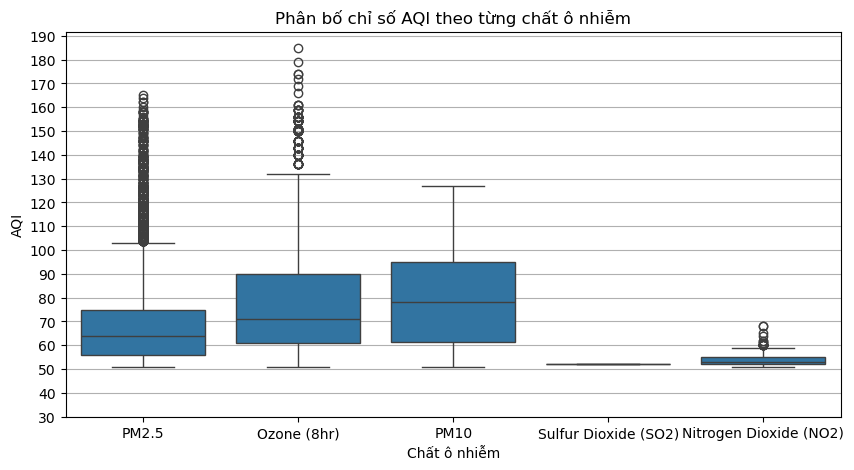

In [4]:
def ve_bieu_do(df):
    df_have_pollutant = df[df["pollutant"] != "Normal"]

    plt.figure(figsize=(10, 5))
    sns.boxplot(x="pollutant", y="aqi", data=df_have_pollutant)
    plt.title("Phân bố chỉ số AQI theo từng chất ô nhiễm")
    plt.xlabel("Chất ô nhiễm")
    plt.ylabel("AQI")
    plt.grid(axis="y")

    plt.yticks(range(30, 200, 10))
    plt.show()


ve_bieu_do(df)

## **CÂU HỎI 2:** THỜI GIAN NÀO TRONG NĂM CÓ CHẤT LƯỢNG KHÔNG KHÍ TỆ TRONG GIAI ĐOẠN 2016 - 2024 Ở SHILIN, ĐÀI LOAN ?


1. **Các thuộc tính sử dụng**

- `aqi`
- `date`

2. **Loại biểu đồ**

- Biểu đồ heatmap

3. **Ý nghĩa của biểu đồ**

- Biểu đồ heatmap thể hiện trung bình giá trị `aqi` trong giai đoạn 2016 - 2024 qua các ngày trong năm

4. **Nguyên nhân sử dụng**

- Làm nổi bật thời gian mà khi đó chỉ số `aqi` lớn tương ứng với chất lượng không khí tệ đi trong năm

5. **Kết luận**

- Giai đoạn từ tháng `1` đến tháng `5` ở Đài Loan có màu đậm hơn so với giai đoạn từ tháng `6` đến tháng `12` chứng tỏ giai đoạn đầu năm, chất lượng không khí tệ hơn so với giai đoạn cuối

- Trong giai đoạn từ tháng `1` đến tháng `5`, tháng `4` và tháng `3` có màu đậm nhất (ứng với từ giá trị `aqi` 60 trở lên), chứng tỏ trong 2 tháng này, chất lượng không khí ở mức đáng báo động

- Trong giai đoạn từ tháng `6` đến tháng `12`, tháng `6` và tháng `7` có màu nhạt nhất (ứng với giá trị `aqi` trong khoảng từ 30 đến 40), do đó trong 2 tháng này, chất lượng không khí tốt, ngược lại tháng `10` có màu đậm nhất (ứng với giá trị `aqi` từ 50 trở lên), chất lượng không khí tệ đi


Tạo 2 cột mới `day` và `month` từ cột `date`


In [5]:
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month

Vẽ biểu đồ


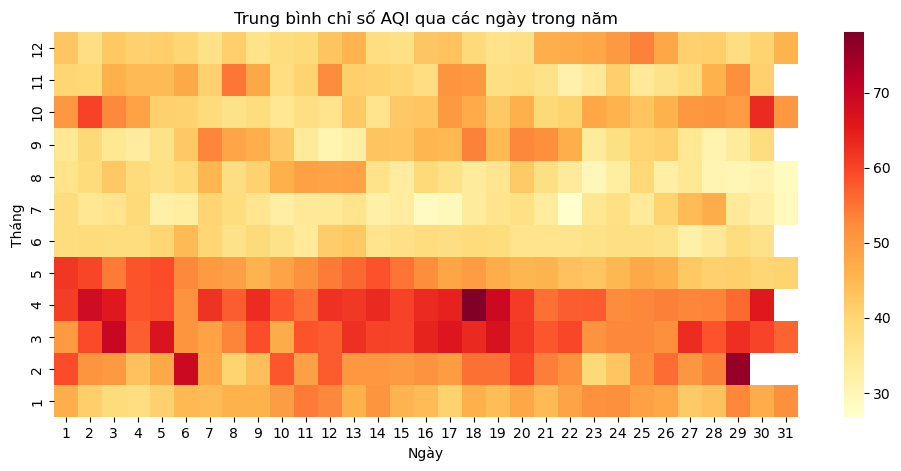

In [6]:
def ve_bieu_do(df):
    daily_aqi = df.groupby(["month", "day"])["aqi"].mean().unstack()

    daily_aqi.sort_index(ascending=False, inplace=True)

    # ve bieu do
    plt.figure(figsize=(12, 5))
    sns.heatmap(daily_aqi, cmap="YlOrRd", cbar=True)
    plt.title("Trung bình chỉ số AQI qua các ngày trong năm")
    plt.xlabel("Ngày")
    plt.ylabel("Tháng")
    plt.show()


ve_bieu_do(df)

## **CÂU HỎI 3:** THỜI ĐIỂM NÀO TRONG NGÀY CÓ CHẤT LƯỢNG KHÔNG KHÍ TỆ TRONG GIAI ĐOẠN 2016 - 2024 Ở SHILIN, ĐÀI LOAN ?


1. **Các thuộc tính sử dụng**

- `aqi`
- `date`

2. **Loại biểu đồ**

- Biểu đồ Violin

3. **Ý nghĩa của biểu đồ**

- Biểu đồ Violin thể hiện được cả phân phối giá trị `aqi` (density plot) và các thống kê cơ bản (boxplot)

4. **Nguyên nhân sử dụng**

- Thể hiện được phân phối giá trị `aqi` qua các thời điểm trong ngày và nhận diện được tần suất xảy ra các giá trị `aqi` tương ứng với từng cấp độ ô nhiễm không khí

5. **Kết luận**

- Biểu đồ ở 4 thời điểm đều dày như nhau trong khoảng từ 100 - 110, tức là tần suất đo được giá trị `aqi` ở khoảng 100 - 110 ở 4 thời điểm là như nhau
- Ở 2 thời điểm `0 - 6h` và `18 - 23h`, khá dày trong khoảng từ 140 - 150 (tiệm cận 151 ứng với chất lượng không khí `Không tốt cho tất cả`), ngược lại trong 2 thời điểm `7 - 12h` và `13 - 17h`, rất mỏng, ứng với tần suất đo được giá `aqi` từ 140 - 150 trong 2 thời điểm `0 - 6h` và `18 - 23h` cao hơn nhiều 2 thời điểm `7 - 12h` và `13 - 17h`. Điều này chứng tỏ nguy cơ ô nhiễm không khí ở 2 thời điểm `0 - 6h` và `18 - 23h` là khá cao.


Tạo cột `hour` từ cột `date`

Tạo cột `hour_period` từ cột `hour`

cột `hour_period` ứng với các thời điểm (từ 0h - 6h, 7h - 12h, 13h - 17h, 18h - 23h)


In [7]:
df["hour"] = df["date"].dt.hour

df["hour_period"] = pd.cut(
    df["hour"],
    bins=[0 - 1, 6, 12, 17, 23],
    labels=["0 - 6", "7 - 12", "13 - 17", "18 - 23"],
)

Lọc các giá trị `aqi` từ 101 đến 150 ứng với chất lượng không khí `Không tốt cho nhóm nhạy cảm`


In [8]:
df_aqi_from_101_150 = df[(df["aqi"] > 100) & (df["aqi"] <= 150)]

vẽ biểu đồ


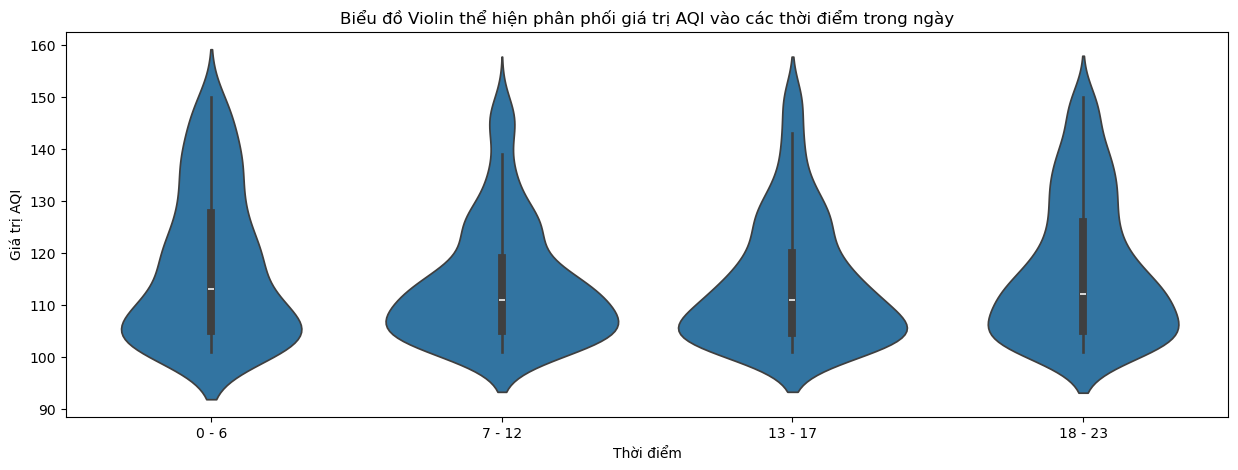

In [9]:
def ve_bieu_do(df_aqi_from_101_150):
    plt.figure(figsize=(15, 5))

    sns.violinplot(x="hour_period", y="aqi", data=df_aqi_from_101_150)

    plt.title(
        "Biểu đồ Violin thể hiện phân phối giá trị AQI vào các thời điểm trong ngày"
    )
    plt.xlabel("Thời điểm")
    plt.ylabel("Giá trị AQI")
    plt.show()


ve_bieu_do(df_aqi_from_101_150)